In [25]:
#### Imports para entrenamiento, predicción y evaluación del modelo ####
#### NO QUITAR ####
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
#### Código Agregado ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud
%matplotlib inline
sns.set_style('darkgrid')

In [26]:
data_file_path = 'C:/Users/78425/Desktop/Diplomatura/Modulo2/DatasetModulo2/DatasetModulo2.csv'
data = pd.read_csv(data_file_path)

In [27]:
data.head()

,FechaSaldos,periodo_cli,periodo,cant_productos,cant_PF,cant_TC,cant_PP,FechaUltMovCA,cant_seguros,importe_consumos,...,cant_PP_ant_2,SaldoPromedioCAPesos_ant_2,SaldoPromedioCADolares_ant_2,SaldoPromedioCCAcreedor_ant_2,importe_consumos_ant_2,TotalConsumoTD_ant_2,cuotas_faltantes_2,score_deuda,target,target2
0,2019-12-06 09:45:00,0,0,2,0,0,0,2019-12-02 00:00:00,0,0,...,0,9440.56,0.00,0.0,0,4577.00,0,NaN,0.0,0.0
1,2019-12-06 09:45:00,0,0,1,0,0,0,2019-12-04 00:00:00,0,0,...,0,5029.59,0.00,0.0,0,8813.89,0,NaN,0.0,0.0
2,2019-12-06 09:45:00,0,0,1,0,0,0,2019-12-05 00:00:00,1,0,...,0,50156.32,0.00,0.0,0,10387.20,0,0.0,0.0,0.0
3,2019-12-06 09:45:00,0,0,6,0,3,0,2019-12-05 00:00:00,1,0,...,0,26082.85,0.00,0.0,0,600.00,0,1.0,0.0,0.0
4,2019-12-06 09:45:00,0,0,6,1,2,0,2019-12-05 00:00:00,1,0,...,0,103080.40,470.04,0.0,0,1618.19,0,0.0,0.0,1.0


In [28]:
data.describe()

,periodo_cli,periodo,cant_productos,cant_PF,cant_TC,cant_PP,cant_seguros,importe_consumos,Edad,SaldoPromedioCAPesos,...,cant_PP_ant_2,SaldoPromedioCAPesos_ant_2,SaldoPromedioCADolares_ant_2,SaldoPromedioCCAcreedor_ant_2,importe_consumos_ant_2,TotalConsumoTD_ant_2,cuotas_faltantes_2,score_deuda,target,target2
count,494887.000000,494887.000000,494887.000000,494887.000000,494887.000000,494887.000000,494887.000000,494887.000000,494887.000000,4.948870e+05,...,494887.000000,4.920230e+05,492023.000000,4.920230e+05,494887.000000,492023.000000,494887.000000,408246.000000,494887.000000,494887.000000
mean,0.527619,0.527619,3.440355,0.140301,1.337829,0.197952,0.427372,21.368741,49.156480,3.840498e+04,...,0.198381,3.232560e+04,745.304979,1.391737e+03,17.097727,4325.130964,8.674578,0.921684,0.006203,0.356332
std,0.553058,0.553058,1.997542,0.773184,1.372484,0.455821,0.847350,1649.526375,17.378098,1.077433e+05,...,0.453510,9.974872e+04,5944.837818,6.245212e+04,1457.140808,8513.074650,27.518923,0.498034,0.078517,0.478915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,36.000000,2.883355e+03,...,0.000000,2.364230e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.000000,1.404255e+04,...,0.000000,1.074610e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,4.000000,0.000000,2.000000,0.000000,1.000000,0.000000,61.000000,3.743868e+04,...,0.000000,3.028789e+04,0.000000,0.000000e+00,0.000000,5525.970000,0.000000,1.000000,0.000000,1.000000
max,2.000000,2.000000,213.000000,210.000000,103.000000,5.000000,18.000000,388641.000000,119.000000,9.412126e+06,...,5.000000,1.602418e+07,753736.920000,2.638704e+07,513214.000000,797835.650000,355.000000,5.000000,1.000000,1.000000


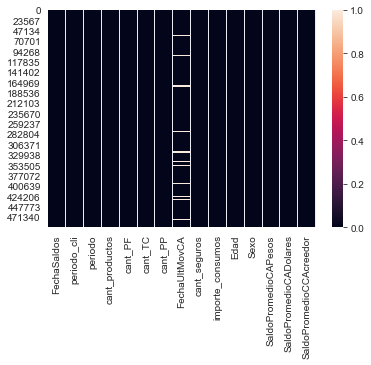

In [29]:
sns.heatmap(data[data.columns[0:15]].isnull())

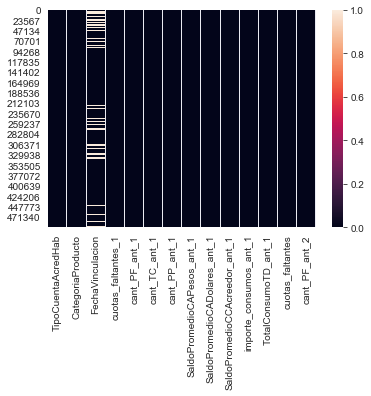

In [30]:
sns.heatmap(data[data.columns[16:30]].isnull())

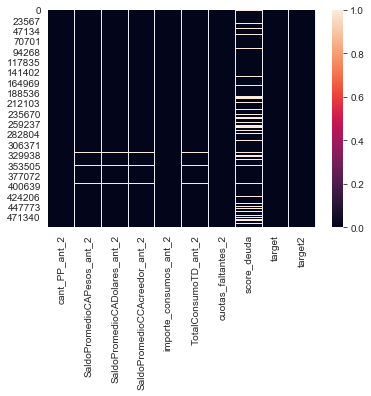

In [31]:
sns.heatmap(data[data.columns[31:41]].isnull())

Vemos que los campos nulos estan en score_deuda, TotalConsumoTD_ant_2, SaldoPromedioCAPesos_ant_2,SaldoPromedioCADolares_ant_2, SaldoPromedio_CCAcreedor_ant_2, TotalConsumoTD_ant_2,FechaVinculacion,FechaUltMovCA

In [32]:
data['TotalConsumoTD_ant_2'].value_counts(normalize=True,dropna=False)

0.00       0.521525
NaN        0.005787
1000.00    0.001423
500.00     0.001026
300.00     0.000824
             ...   
1782.08    0.000002
7980.55    0.000002
5241.23    0.000002
1512.36    0.000002
2625.43    0.000002
Name: TotalConsumoTD_ant_2, Length: 179774, dtype: float64

In [33]:
moda_TotalConsumoTD_ant_2=data['TotalConsumoTD_ant_2'].mode()
moda_TotalConsumoTD_ant_2[0]
data['TotalConsumoTD_ant_2'].fillna(moda_TotalConsumoTD_ant_2[0], inplace=True)

In [ ]:
sns.pairplot(data[:10])